In [1]:
# %pip install python-dotenv
# %pip install seaborn
# %pip install tensorflow_data_validation
#  %pip install git+https://github.com/tensorflow/docs



In [2]:
import os
import pandas as pd
import geopandas as gpd
import pygeos as pg
import numpy as np
# import tensorflow as tf
# import tensorflow_data_validation as tfdv
import sklearn as sk
import scipy as sp
import seaborn as sns
# from datetime import datetime
# from dotenv import load_dotenv
from IPython.display import clear_output
from matplotlib import pyplot as plt
from shapely import wkt


f:\Programs\Miniconda3\envs\ml\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Red\AppData\Local\Temp\ipykernel_581480\2532399237.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.i

In [3]:
# The following lines adjust the granularity of reporting.
#pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
os.chdir('F:\\Uni Files\\4710\\4710 Project\\MLweatherForestFire')


In [4]:
def getGPDfromPD(df: pd.DataFrame, geomCol: str, crs: str = "EPSG:3978") -> gpd.GeoDataFrame:
    """
    Convert a pandas dataframe to a geopandas dataframe
    :param df: pandas dataframe
    :param geomCol: name of the geometry column
    :param crs: coordinate reference system
    :return: geopandas dataframe
    """
    if 'geom' in df.columns:
        df.rename(columns={'geom': 'geometry'}, inplace=True)

    df[geomCol] = df[geomCol].apply(wkt.loads)
    gdf = gpd.GeoDataFrame(df, geometry=geomCol, crs=crs)
    return gdf


In [5]:
fireWeatherTable = "Data/FinalFeatureV3.csv"
dfFireWeather = pd.read_csv(fireWeatherTable)


In [6]:
dfEval = dfFireWeather.copy(deep=True)
dfEval.describe()

,ENTRYID,YEAR,MONTH,DAY,SIZE_HA,SIZE_HA_BIN,ELEVATIONM,DIST_TO_WATER,DAYW,MAXTEMP,MEANHUMIDITY,MEANWINDSPEED,MAXWINDSPEED,TOTALPRECIP,LONG,LAT,LONGBIN,LATBIN,utc,7daySumMaxTemp,7daySumHumidity,7daySumWindSpeed,14daySumMaxTemp,14daySumHumidity,14daySumWindSpeed
count,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0
mean,1143.2,2009.5,6.4,16.7,10705.3,1.7,742.7,3881.6,15.7,23.1,61.2,8.3,16.2,0.2,5375901.9,2375607.2,365.0,384.7,1261799138755980800.0,170.5,430.9,65.9,326.3,874.2,135.9
std,1439.2,5.3,1.1,9.0,29415.9,1.1,513.4,4094.2,9.0,6.4,12.1,3.4,5.9,1.5,139093.0,204885.0,111.1,97.6,167734934973968416.0,38.0,51.2,10.5,77.3,84.5,17.4
min,283.0,2000.0,1.0,2.0,201.8,0.0,225.0,0.0,1.0,-6.2,28.0,2.1,4.0,0.0,4918132.3,1567321.0,0.0,0.0,956880000000000000.0,-45.4,268.6,46.4,-121.6,576.6,99.8
25%,522.8,2005.0,6.0,8.0,704.4,1.0,434.0,1114.6,7.0,21.1,53.0,5.9,11.0,0.0,5267895.2,2246671.4,278.5,323.0,1120867200000000000.0,163.0,395.5,59.3,311.7,833.2,122.9
50%,753.5,2010.0,6.0,17.0,2070.2,2.0,496.0,2467.7,16.0,24.4,61.0,7.5,16.0,0.0,5379082.5,2392909.7,367.5,393.0,1276905600000000000.0,178.8,441.0,65.1,345.1,881.3,135.0
75%,1539.2,2015.0,7.0,25.0,7250.0,3.0,1161.0,5318.9,24.0,26.9,68.6,10.2,20.0,0.0,5493470.9,2524069.0,459.0,455.0,1431734400000000000.0,191.8,460.2,72.5,374.1,921.1,148.6
max,10650.0,2020.0,10.0,31.0,476376.8,3.0,3668.0,29418.8,30.0,34.9,96.9,30.1,37.0,20.8,5632110.7,2763468.2,569.0,569.0,1593388800000000000.0,218.7,650.9,100.5,417.0,1313.1,194.4


In [7]:
# log transform SIZE_HA
dfEval['SIZE_HA'] = np.log(dfEval['SIZE_HA'])

# binning SIZE_HA into 4 categories L M H E in SIZE_HA_BIN
dfEval['SIZE_HA_BIN'] = pd.qcut(dfEval['SIZE_HA'], 4, labels=['L', 'M', 'H', 'E'])

# count the number of fires in each SIZE_HA_BIN
dfEval['SIZE_HA_BIN'].value_counts()

L    209
M    209
H    209
E    209
Name: SIZE_HA_BIN, dtype: int64

In [8]:
# print rows with nan
print(dfEval.describe())

       ENTRYID   YEAR  MONTH   DAY  SIZE_HA  ELEVATIONM  DIST_TO_WATER  DAYW  \
count    836.0  836.0  836.0 836.0    836.0       836.0          836.0 836.0   
mean    1143.2 2009.5    6.4  16.7      7.8       742.7         3881.6  15.7   
std     1439.2    5.3    1.1   9.0      1.6       513.4         4094.2   9.0   
min      283.0 2000.0    1.0   2.0      5.3       225.0            0.0   1.0   
25%      522.8 2005.0    6.0   8.0      6.6       434.0         1114.6   7.0   
50%      753.5 2010.0    6.0  17.0      7.6       496.0         2467.7  16.0   
75%     1539.2 2015.0    7.0  25.0      8.9      1161.0         5318.9  24.0   
max    10650.0 2020.0   10.0  31.0     13.1      3668.0        29418.8  30.0   

       MAXTEMP  MEANHUMIDITY  MEANWINDSPEED  MAXWINDSPEED  TOTALPRECIP  \
count    836.0         836.0          836.0         836.0        836.0   
mean      23.1          61.2            8.3          16.2          0.2   
std        6.4          12.1            3.4           5.9

In [9]:
# Store our random selection, run once
# randomTrain = "RandomTrain"
# dfTrain.to_sql(randomTrain, db_push_con, if_exists='replace', index=False)

# randomTest = "RandomTest"
# dfTest.to_sql(randomTest, db_push_con, if_exists='replace', index=False)

# randomValidate = "RandomValidate"
# dfValidate.to_sql(randomValidate, db_push_con, if_exists='replace', index=False)


In [10]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.inspection import DecisionBoundaryDisplay


In [11]:
dfEval.columns


Index(['ENTRYID', 'FIRE_ID', 'FIRENAME', 'YEAR', 'MONTH', 'DAY', 'REP_DATE',
       'SIZE_HA', 'SIZE_HA_BIN', 'GEOM', 'ELEVATIONM', 'DIST_TO_WATER',
       'CLIMATEID', 'PROVINCECODE', 'DAYW', 'MAXTEMP', 'MEANHUMIDITY',
       'MEANWINDSPEED', 'MAXWINDSPEED', 'TOTALPRECIP', 'RAIN', 'LONG', 'LAT',
       'LONGBIN', 'LATBIN', 'utc', '7daySumMaxTemp', '7daySumHumidity',
       '7daySumWindSpeed', '7dayRain', '14daySumMaxTemp', '14daySumHumidity',
       '14daySumWindSpeed', '14dayRain'],
      dtype='object')

In [12]:
# sum of size_ha column
dfEval['SIZE_HA'].sum()

6551.109478673032

In [13]:
dfTrim = dfEval.copy(deep=True)

# edit this
dfTrim = dfTrim.drop(columns={'ENTRYID', 'FIRE_ID', 'FIRENAME', 'GEOM', 'CLIMATEID', 'PROVINCECODE',
                              'TOTALPRECIP', 'LONG', 'LAT', 'REP_DATE', 'SIZE_HA', 'utc'})


In [14]:
dfTrim.columns

Index(['YEAR', 'MONTH', 'DAY', 'SIZE_HA_BIN', 'ELEVATIONM', 'DIST_TO_WATER',
       'DAYW', 'MAXTEMP', 'MEANHUMIDITY', 'MEANWINDSPEED', 'MAXWINDSPEED',
       'RAIN', 'LONGBIN', 'LATBIN', '7daySumMaxTemp', '7daySumHumidity',
       '7daySumWindSpeed', '7dayRain', '14daySumMaxTemp', '14daySumHumidity',
       '14daySumWindSpeed', '14dayRain'],
      dtype='object')

In [72]:
#show first july entry for each year 2000 - 2022
selected = []
for year in range(2000, 2022):
    selected.append(dfTrim[(dfTrim['YEAR'] == year) & (dfTrim['MONTH'] == 7)].iloc[0])

print(selected)


IndexError: single positional indexer is out-of-bounds

In [16]:
# replace size_ha_bin 0 1 2 3 with L M H E

# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('0', 'L')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('1', 'M')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('2', 'H')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('3', 'E')


In [17]:
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
         2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
trainYears = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
testYears = [2017, 2018, 2019, 2020, 2021, 2022]
dfTrain = dfTrim[dfTrim['YEAR'].isin(trainYears)].drop(columns={'SIZE_HA_BIN'})
dfTest = dfTrim[dfTrim['YEAR'].isin(testYears)].drop(columns={'SIZE_HA_BIN'})


In [18]:
def scaleData(df: pd.DataFrame) -> pd.DataFrame:
    mean = df.mean()
    std = df.std()
    # regularize y values using z score
    df = (df - mean) / std
    # set max value to 3 zscore
    df[df > 3] = 3
    # set min value to -3 zscore
    df[df < -3] = -3

    # shift the wole train set to be positive
    # df = df + 3

    # return dataframe list of means and stds
    return df, mean, std


In [23]:
# keep categorical columns
categoricalColumns = ['MONTH', 'DAY', 'RAIN', '7dayRain', '14dayRain']
dfPreserve = dfTrain.copy(deep=True)
dfPreserve = dfPreserve[categoricalColumns]


In [24]:
dfTemp = dfTrain.copy(deep=True)
dfTemp.drop(categoricalColumns, axis=1, inplace=True)
dfTrainScaled, dfMeans, dfStdevs = scaleData(dfTemp)
dfTrainScaled['YEAR'] = dfTrain['YEAR']
dfTrainScaled['SIZE_HA_BIN'] = dfTrim[dfTrim['YEAR'].isin(trainYears)]['SIZE_HA_BIN']



In [27]:
for i in range(len(categoricalColumns)):
    # create a binarizer for each categorical column
    binarizer = LabelBinarizer().fit(dfPreserve[categoricalColumns[i]])
    # binarize the column
    dfPreserve[categoricalColumns[i]] = binarizer.transform(dfPreserve[categoricalColumns[i]])


# merge the scaled data with the categorical data
dfTrainScaled[['MONTH', 'DAY', 'RAIN', '7dayRain', '14dayRain']] = dfPreserve[['MONTH', 'DAY', 'RAIN', '7dayRain', '14dayRain']]

In [28]:

print(dfTrainScaled.count())
print(dfTrainScaled.isna().sum().sum())
print(dfTrainScaled.dtypes)


YEAR                 754
ELEVATIONM           754
DIST_TO_WATER        754
DAYW                 754
MAXTEMP              754
MEANHUMIDITY         754
MEANWINDSPEED        754
MAXWINDSPEED         754
LONGBIN              754
LATBIN               754
7daySumMaxTemp       754
7daySumHumidity      754
7daySumWindSpeed     754
14daySumMaxTemp      754
14daySumHumidity     754
14daySumWindSpeed    754
SIZE_HA_BIN          754
MONTH                754
DAY                  754
RAIN                 754
7dayRain             754
14dayRain            754
dtype: int64
0
YEAR                    int64
ELEVATIONM            float64
DIST_TO_WATER         float64
DAYW                  float64
MAXTEMP               float64
MEANHUMIDITY          float64
MEANWINDSPEED         float64
MAXWINDSPEED          float64
LONGBIN               float64
LATBIN                float64
7daySumMaxTemp        float64
7daySumHumidity       float64
7daySumWindSpeed      float64
14daySumMaxTemp       float64
14daySumHumidit

In [29]:
print(dfTrainScaled.describe())


        YEAR  ELEVATIONM  DIST_TO_WATER  DAYW  MAXTEMP  MEANHUMIDITY  \
count  754.0       754.0          754.0 754.0    754.0         754.0   
mean  2008.6        -0.0           -0.0  -0.0      0.0           0.0   
std      4.8         1.0            0.9   1.0      0.9           1.0   
min   2000.0        -1.0           -1.0  -1.6     -3.0          -2.7   
25%   2005.0        -0.6           -0.7  -1.0     -0.3          -0.7   
50%   2009.0        -0.5           -0.3   0.0      0.2          -0.0   
75%   2013.0         0.8            0.3   0.9      0.6           0.6   
max   2016.0         3.0            3.0   1.6      1.8           2.9   

       MEANWINDSPEED  MAXWINDSPEED  LONGBIN  LATBIN  7daySumMaxTemp  \
count          754.0         754.0    754.0   754.0           754.0   
mean            -0.0          -0.0     -0.0     0.0             0.0   
std              1.0           1.0      1.0     1.0             0.8   
min             -1.9          -2.0     -2.9    -3.0            -3.0

In [30]:
C = 1  # SVM regularization parameter

model01 = svm.LinearSVC(C=C, max_iter=10000)
model02 = svm.SVC(kernel="linear", C=C, decision_function_shape='ovo')
model03 = svm.SVC(kernel="rbf", gamma=0.7, C=C, decision_function_shape='ovo')
model04 = svm.SVC(kernel="poly", degree=6, gamma="scale",
                 C=C, decision_function_shape='ovo')
model05 = svm.SVC(kernel="sigmoid", gamma="scale", C=C, decision_function_shape='ovo')


# random forest
model06 = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
model07 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model08 = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0)
model09 = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)



In [31]:

modelNames = ['SVM Linear SVC','SVM Linear',  'SVM RBF', 'SVM Poly', 'SVM Sigmoid', 'Random Forest 20', 'Random Forest 2', 'Random Forest 50', 'Random Forest 100']


In [32]:

# excludeList = ['SIZE_HA_BIN', 'YEAR', 'DAY', 'DAYW', 'MAXTEMP', 'MEANHUMIDITY', 'MEANWINDSPEED', 'MAXWINDSPEED', 'RAIN']
excludeList = ['SIZE_HA_BIN', 'YEAR', 'MAXTEMP', 'MEANHUMIDITY', 'MEANWINDSPEED', 'MAXWINDSPEED']
dfFeatures = dfTrainScaled.drop(excludeList, axis=1)
dfLabel = dfTrainScaled['SIZE_HA_BIN']


In [33]:

model01 = model01.fit(dfFeatures, dfLabel)
model02 = model02.fit(dfFeatures, dfLabel)
model03 = model03.fit(dfFeatures, dfLabel)
model04 = model04.fit(dfFeatures, dfLabel)
model05 = model05.fit(dfFeatures, dfLabel)
model06 = model06.fit(dfFeatures, dfLabel)
model07 = model07.fit(dfFeatures, dfLabel)
model08 = model08.fit(dfFeatures, dfLabel)
model09 = model09.fit(dfFeatures, dfLabel)


In [34]:
modelList = [model01, model02, model03, model04, model05, model06, model07, model08, model09]

In [35]:
dfMeans.describe()

count     16.0
mean     598.6
std     1028.9
min        8.4
25%       51.5
50%      246.7
75%      509.4
max     3954.2
dtype: float64

In [36]:
dfTestPreserve = dfTest.copy(deep=True)
dfTestPreserve = dfTestPreserve[categoricalColumns]

for i in range(len(categoricalColumns)):
    # create a binarizer for each categorical column
    binarizer = LabelBinarizer().fit(dfPreserve[categoricalColumns[i]])
    # binarize the column
    dfTestPreserve[categoricalColumns[i]] = binarizer.transform(dfTestPreserve[categoricalColumns[i]])



In [40]:
dfTestScaled = dfTest.copy(deep=True)
dfTestScaled.drop(categoricalColumns, axis=1, inplace=True)

for colNum in range(0, len(dfTestScaled.columns)):
    dfTestScaled[dfTest.columns[colNum]] = (dfTest[dfTest.columns[colNum]] - dfMeans[colNum]) / dfStdevs[colNum]
    # dfTestScaled = (dfTest - dfMeans) / dfStdevs

# shift the wole test set to be positive
# dfTestScaled = dfTestScaled + 3

# add year column back
dfTestScaled['YEAR'] = dfTest['YEAR']
dfTestScaled['SIZE_HA_BIN'] = dfTrim[dfTrim['YEAR'].isin(testYears)]['SIZE_HA_BIN']

# merge the scaled data with the categorical data
dfTestScaled[['MONTH', 'DAY', 'RAIN', '7dayRain', '14dayRain']] = dfTestPreserve[['MONTH', 'DAY', 'RAIN', '7dayRain', '14dayRain']]


In [41]:
# print(dfTestScaled.describe())

In [42]:
dfTestFeatures = dfTestScaled.drop(excludeList, axis=1)

# predict on test data
dfTestScaled['PREDICTED_SIZE_HA_BIN1'] = model01.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN2'] = model02.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN3'] = model03.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN4'] = model04.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN5'] = model05.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN6'] = model06.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN7'] = model07.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN8'] = model08.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN9'] = model09.predict(dfTestFeatures)



In [43]:
# show roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [44]:
# show precision recall curve
def plot_precision_recall_curve(precision, recall, label=None):
    plt.plot(recall, precision, linewidth=2, label=label)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')


In [45]:
# # show accuracy, precision, recall, f1 score
# def show_metrics(y_test, y_pred, labels):
#     print("Accuracy: ", accuracy_score(y_test, y_pred))
#     print("Precision: ", precision_score(
#         y_test, y_pred, labels=labels, average='micro'))
#     print("Recall: ", recall_score(
#         y_test, y_pred, labels=labels, average='micro'))
#     print("F1 Score: ", f1_score(y_test, y_pred, labels=labels, average='micro'))


In [46]:
# show accuracy, precision, recall, f1 score
def show_metrics(y_test, y_pred):
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred, average='macro'))
    print("Recall: ", recall_score(y_test, y_pred, average='macro'))
    print("F1Score: ", f1_score(y_test, y_pred, average='macro'))


In [47]:
labels = ['L', 'M', 'H', 'E']
# show metrics for each model
for i in range(1, 7):
    print("Model ", modelNames[i-1])
    show_metrics(dfTestScaled['SIZE_HA_BIN'],
                 dfTestScaled['PREDICTED_SIZE_HA_BIN' + str(i)])
    print("")


Model  SVM Linear SVC
Accuracy:  0.2073170731707317
Precision:  0.360445205479452
Recall:  0.26796536796536796
F1Score:  0.1356060606060606

Model  SVM Linear
Accuracy:  0.2926829268292683
Precision:  0.40483870967741936
Recall:  0.3262987012987013
F1Score:  0.22229185908431193

Model  SVM RBF
Accuracy:  0.25609756097560976
Precision:  0.06402439024390244
Recall:  0.25
F1Score:  0.10194174757281553

Model  SVM Poly
Accuracy:  0.35365853658536583
Precision:  0.18130366900858702
Recall:  0.32196969696969696
F1Score:  0.21539491298527447

Model  SVM Sigmoid
Accuracy:  0.3170731707317073
Precision:  0.48120915032679734
Recall:  0.3124729437229437
F1Score:  0.2659141974210467

Model  Random Forest 20
Accuracy:  0.25609756097560976
Precision:  0.18521973466003316
Recall:  0.24648268398268397
F1Score:  0.1518065268065268



f:\Programs\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\Programs\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\Programs\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\Programs\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classifica

In [48]:
label_binarizer = LabelBinarizer().fit(dfLabel)
y_onehot_test = label_binarizer.transform(dfTestScaled['SIZE_HA_BIN'])

In [49]:
# def plotModel(currModel, dfTestFeatures, class_of_interest):
#     class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
#     y_score = currModel.predict_proba(dfTestFeatures)
#     RocCurveDisplay.from_predictions(
#         y_onehot_test[:, class_id],
#         y_score[:, class_id],
#         name=f"{class_of_interest} vs the rest",
#         color="darkorange",
#     )
#     # 

#     plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
#     plt.axis("square")
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title("One-vs-Rest ROC curves:\n")
#     plt.legend()
#     plt.show()

In [50]:
# for label in labels:
#     for i in range(2, 10):
#         print("Model ", i, " for ", label)
#         plotModel(eval('model0' + str(i)), dfTestFeatures, label)

In [51]:
def plotModelTogether(df, class_of_interest):
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    
    fig, ax = plt.subplots( figsize=(20, 10) )
    # ax = fig.add_subplot(111, aspect='equal')

    # scatter plot
    for i in range(2, 7):
        currModel = modelList[i-1]
        try:
            y_score = currModel.decision_function(df)
        except:
            y_score = currModel.predict_proba(df)
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"{class_of_interest} vs the rest {modelNames[i-1]}",
            ax=ax,
        )

    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    ax.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curves:\n")
    ax.legend()
    plt.show()



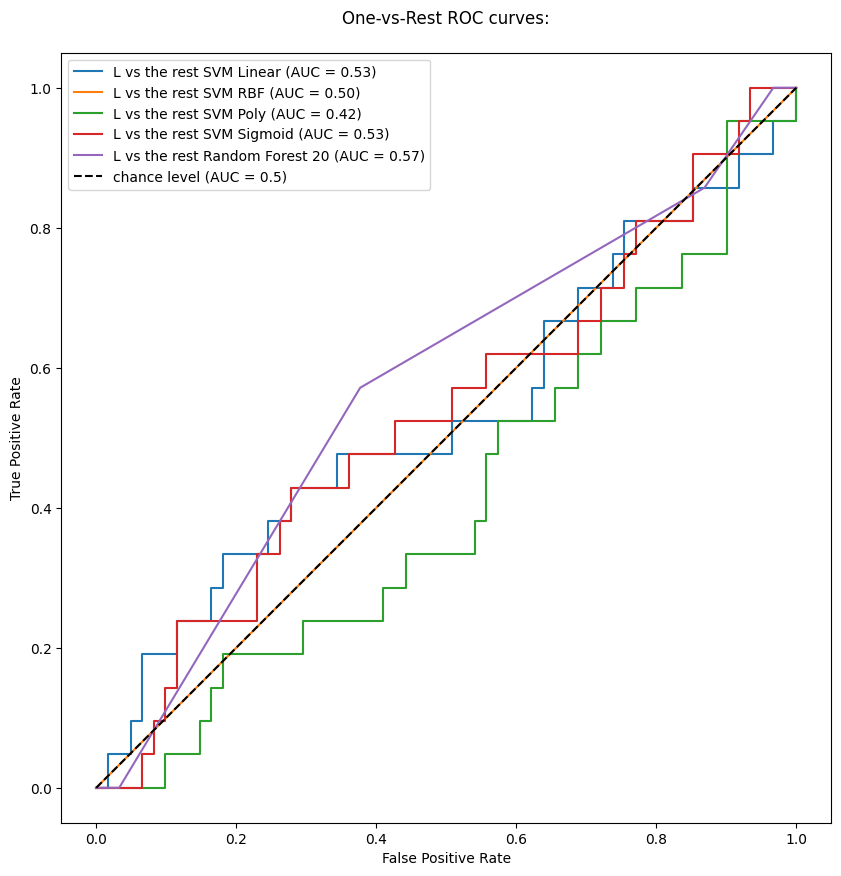

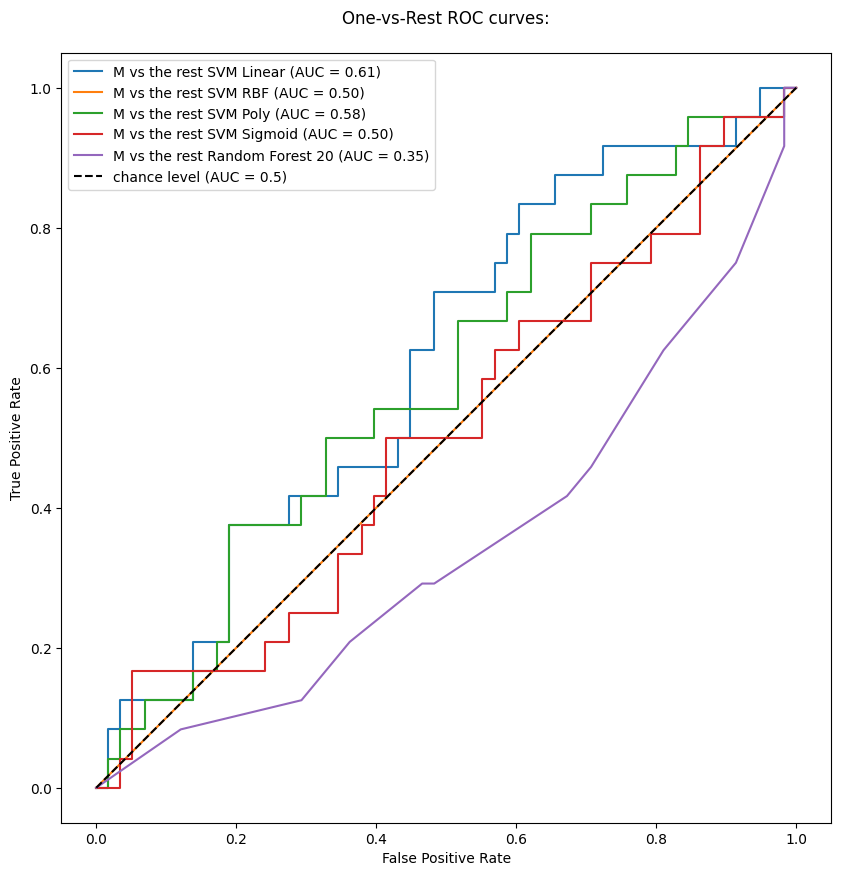

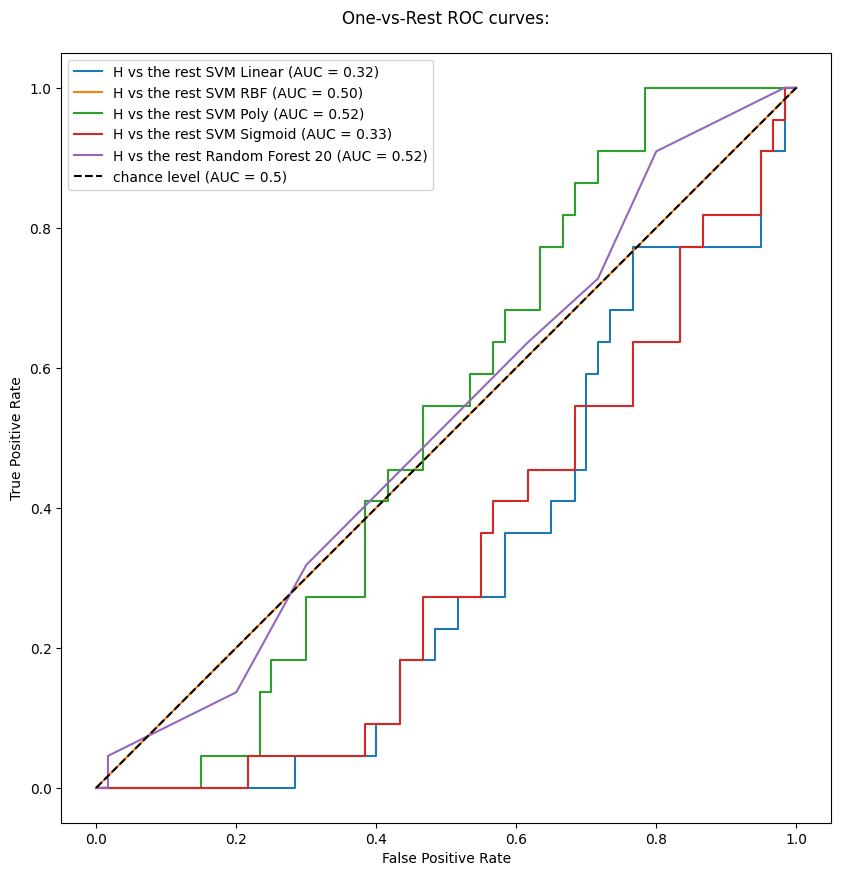

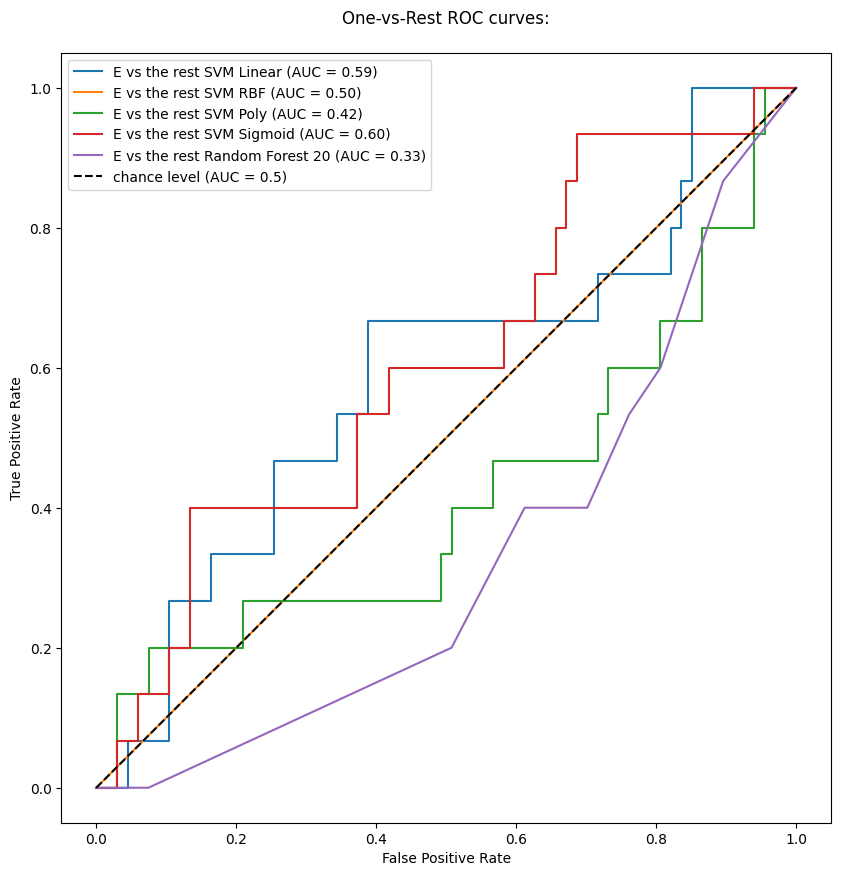

In [52]:
for label in labels:
    plotModelTogether(dfTestFeatures, label)

for label in labels:
    plotModelTogether(dfFeatures, label)

def printMacroROCAUC(y_test, y_score):
    print("Macro ROC AUC: ", roc_auc_score(
        y_test,
        y_score,
        multi_class="ovr",
        average="macro",
    ))



for i in range(2, 7):
    print("Model ", modelNames[i-1])
    printMacroROCAUC(y_onehot_test, eval('model0' + str(i)).decision_function(dfTestFeatures))

In [53]:
dfTestScaled.to_csv('test_v12.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'test_all.csv'

import tensorflow as tf
from tensorflow import feature_column
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.

#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = dfTrainScaled.sample(n=dfTrainScaled.shape[0])
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 6
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model.

#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a one-dimensional 
  # 784-element array.
  # model.add(tf.keras.layers.Flatten(input_shape=(1, 13)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=6, input_shape=(13,), activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])
  return model        


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)
 
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # # To track the progression of training, we're going to take a snapshot
  # # of the model's root mean squared error at each epoch. 
  rmse = hist["mean_squared_error"]

  return epochs, rmse

print("Defined the build_model and train_model functions.")

## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature. 


excludeList = ['SIZE_HA_BIN', 'YEAR', 'DAY', 'DAYW', 'MAXTEMP', 'MEANHUMIDITY', 'MEANWINDSPEED', 'MAXWINDSPEED', 'RAIN']
dfFeatures = dfTrainScaled.drop(excludeList, axis=1)
# dfLabel = dfTrainScaled['SIZE_HA_BIN']
# dfLabel['SIZE_HA_BIN'] = feature_column.categorical_column_with_vocabulary_list('Type', ['L', 'M', 'H', 'E'])
dfLabel = dfFireWeather[dfFireWeather['YEAR'].isin(
    [2010, 2011, 2012, 2013, 2014, 2015, 2016])]['SIZE_HA'].copy(deep=True)


dfFeatures.dtypes

# The following variables are the hyperparameters.
learning_rate = 10
epochs = 30
batch_size = 1

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
epochs, rmse = train_model(my_model, dfFeatures.to_numpy(), dfLabel, epochs, batch_size)

# print("\nThe learned weight for your model is %.4f" % weight)
# print("The learned bias for your model is %.4f\n" % bias )

# plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# plotter = tfdocs.plots.HistoryPlotter(metric = 'sparse_categorical_crossentropy', smoothing_std=10)
# plotter.plot(size_histories)
# plt.ylim([0.5, 0.7])


## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

def predict(feature, label):
  """Predict house values based on a feature."""
  predicted_values = my_model.predict_on_batch(x=feature)
  print(predicted_values)
  show_metrics(label.astype(float), predicted_values)

dfTestScaled = pd.DataFrame()
for colNum in range(0, len(dfTest.columns)):
    dfTestScaled[dfTest.columns[colNum]] = (dfTest[dfTest.columns[colNum]] - dfMeans[colNum]) / dfStdevs[colNum]
    # dfTestScaled = (dfTest - dfMeans) / dfStdevs

# shift the wole test set to be positive
# dfTestScaled = dfTestScaled + 3

# add year column back
dfTestScaled['YEAR'] = dfTest['YEAR']
dfTestScaled['SIZE_HA_BIN'] = dfFireWeather[dfFireWeather['YEAR'].isin(
    [2017, 2018, 2019, 2020])]['SIZE_HA'].copy(deep=True)


print(dfTestScaled.drop(excludeList, axis=1).dtypes)
print(dfTestScaled['SIZE_HA_BIN'].dtypes)

predict(dfTestScaled.drop(excludeList, axis=1), dfTestScaled['SIZE_HA_BIN'])

# create nn model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

# train model
model.fit(dfFeatures, dfLabel, epochs=100)



# predict on test data  
dfTestScaled['PREDICTED_SIZE_HA_BIN10'] = model.predict_classes(dfTestFeatures)

# show metrics for each model
print("Model 10")
show_metrics(dfTestScaled['SIZE_HA_BIN'], dfTestScaled['PREDICTED_SIZE_HA_BIN10'])